# LineIntegralConvolution.jl

Line Integral Convolution (LIC) visualization tool for vector fields

## Usage

In [1]:
using Plots

In [2]:
using LineIntegralConvolution

### Electrostatic Simulation 

#### Parameters

In [3]:
## image parameters
pt_per_meter = 25  # resolution, number of pixels per meter

x_min = -10.
x_max = 10.

y_min = 2.
y_max = 13.

n_charges = 10  # number of charges to simulate

charge_value = 1e-6  # electric charge value (C)

distribution = "circle"  # "circle", "random"

SEED = 2

field_result = simulate_2d_electrostatic(
    x_min, x_max, y_min, y_max, pt_per_meter,
    n_charges, distribution, SEED, charge_value
)

(x = -10.0:0.04:10.0, y = 2.0:0.04:13.0, z = [29.272024575999602 29.302289682380632 … 29.302511929538035 29.27224637700384; 29.29343606943352 29.323862763552 … 29.324086201595044 29.293659050438517; … ; 29.29359304862489 29.324020931206924 … 29.324244378009027 29.293816038308492; 29.27218174040865 29.30244802915714 … 29.302670285028274 29.272403550047372], f = [-510.4817267597854 -512.9645372937224 … 512.982787397406 510.49990446635275; -514.4302227985906 -516.9546668419655 … 516.9732241044095 514.4487042173035; … ; -514.459312081199 -516.9840639432288 … 517.0026234767391 514.4777957453409; -510.5105713087179 -512.9936849105277 … 513.0119372500734 510.5287512262083;;; -335.1912588482547 -338.6223552396573 … -338.64768561346307 -335.21627209048773; -335.4223762861804 -338.87290992000396 … -338.8983848444957 -335.44753020234407; … ; 335.4240061562363 338.87468215462866 … 338.90015813793764 335.4491611026613; 335.1930184413268 338.6242576369062 … 338.6495890726365 335.21803271716], cx = [

#### Figures

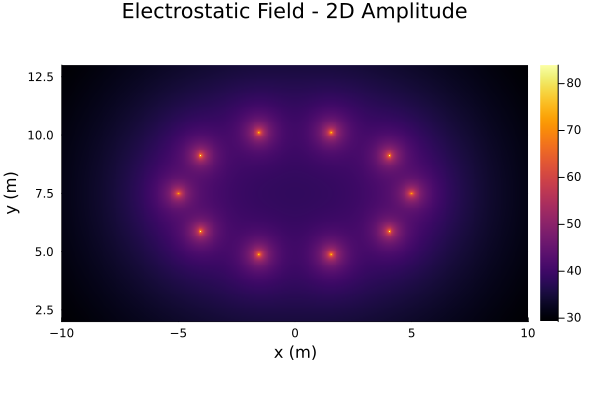

In [4]:
heatmap(
    field_result.x,
    field_result.y,
    field_result.z, 
    aspect_ratio=:equal,
    xlim=(x_min, x_max),
    ylim=(y_min, y_max)
)
title!("Electrostatic Field - 2D Amplitude")
xlabel!("x (m)")
ylabel!("y (m)")
# TODO colorbar label is missing

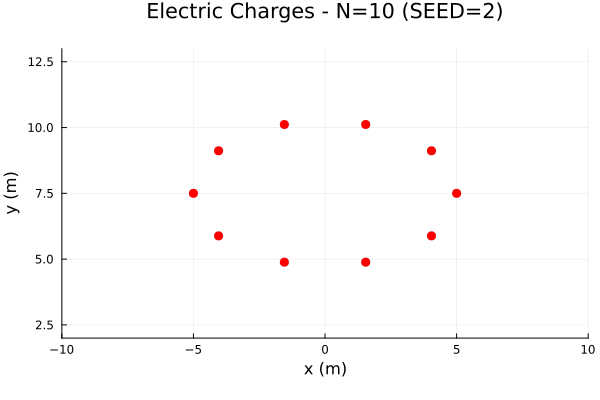

In [5]:
scatter(
    [field_result.cx], 
    [field_result.cy],
    zcolor=field_result.cq,
    legend=false, 
    markerstrokewidth=0, 
    marker=:circle, 
    markersize=5.0, 
    aspect_ratio=:equal,
    xlim=(x_min, x_max),
    ylim=(y_min, y_max),
    c=:rainbow
)
title!("Electric Charges - N=$n_charges (SEED=$SEED)")
xlabel!("x (m)")
ylabel!("y (m)")

### LIC

#### Parameters

In [6]:
SEED = 1  # Random Seed

e_field = Field2D(
    field_result.x, 
    field_result.y,
    field_result.f[:, :, 1],
    field_result.f[:, :, 2]
)

kernel_size = 30
kernel_type = "LPF"
f_x = e_field.pos_x
f_y = e_field.pos_y
f_lin = field_result.f
img = lic(f_x, f_y, f_lin, kernel_size, kernel_type, SEED)

3.064161532008447 %
7.142960455899796 %
16.029535132633285 %
32.36064103676705 %
49.06636003355608 %
53.56316352801643 %
55.30750094014869 %
70.77583962509763 %
75.43753073563019 %
81.76183864155746 %


(rnd_img = [-0.2639666543379531 0.19378913869906178 … 0.4543730594156372 -0.4430382903099537; -0.15348298580803954 0.26752531342563324 … -0.004394070742646861 0.41992534874836385; … ; -0.12566394373431988 -0.3572580922426327 … 0.1778219600089712 -0.10435822954527985; 0.4067629643764612 -0.17658425428918179 … -0.4469132278106702 -0.3786577857016411], final_img = [0.0018887345293892577 0.026670055713269303 … 0.39206329869021245 0.3812298732401026; 0.008950434759768644 0.03236568591966438 … 0.3738972932280015 0.504703833057196; … ; 0.3619276353139733 0.37713284572850725 … -0.18820632650607438 -0.19702600751054133; 0.3975524155165759 0.4316828003740211 … -0.21825656429828466 -0.2145344851318025])

#### Initialization

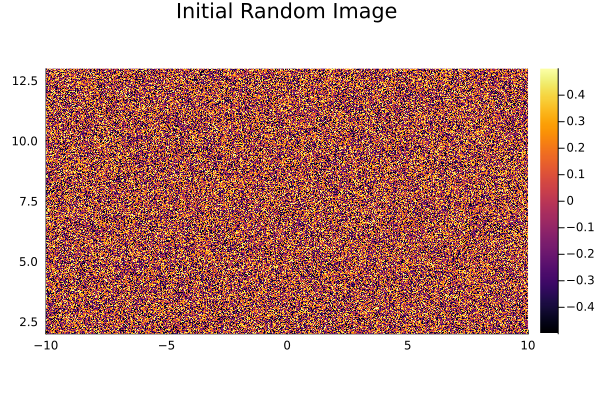

In [7]:
heatmap(
    field_result.x, 
    field_result.y,
    img.rnd_img,
    aspect_ratio=:equal,
    xlim=(x_min, x_max),
    ylim=(y_min, y_max)
)
title!("Initial Random Image")

#### Figures

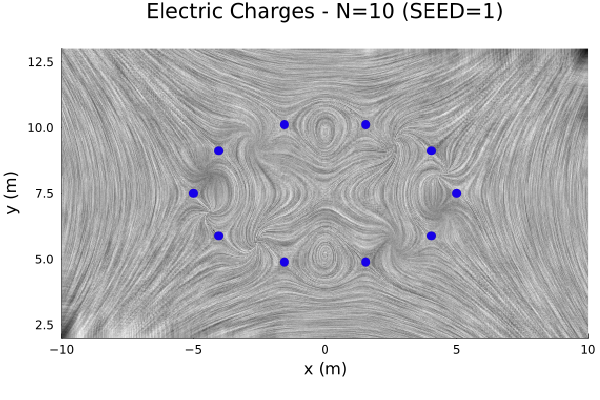

In [8]:
heatmap(
    field_result.x, 
    field_result.y,
    img.final_img,
    aspect_ratio=:equal,
    xlim=(x_min, x_max),
    ylim=(y_min, y_max),
    c=:grays
)
title!("LIC (LPF)")
scatter!(
    [field_result.cx], 
    [field_result.cy],
    zcolor=field_result.cq,
    legend=false, 
    markerstrokewidth=0, 
    marker=:circle, 
    markersize=5.0, 
    aspect_ratio=:equal,
    xlim=(x_min, x_max),
    ylim=(y_min, y_max),
    c=:rainbow,
    colorbar=false
)
title!("Electric Charges - N=$n_charges (SEED=$SEED)")
xlabel!("x (m)")
ylabel!("y (m)")

In [9]:
savefig("data/electric_charges.pdf")  # export to PDF vectorial image
savefig("data/electric_charges.png")  # export to PNG

"/Users/davide/Documents/SW Projects/LineIntegralConvolution.jl/data/electric_charges.png"